In [12]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
%cd /content/gdrive/My Drive/Kaggle_Data/P2P lending/

/content/gdrive/My Drive/Kaggle_Data/P2P lending


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()
data =  pd.read_csv("data_2.csv",index_col=False)
data=data[['grade','home_ownership','addr_state','verification_status','sub_grade','purpose','term','initial_list_status','term_int','emp_length_int','mths_since_issue_d','int_rate','funded_amnt','mths_since_earliest_cr_line','installment','inq_last_6mths',
          'open_acc','pub_rec','total_acc','acc_now_delinq','total_rev_hi_lim','annual_inc','mths_since_last_delinq','dti','mths_since_last_record','Non-Default_Default']]
data = data.rename(columns={'Non-Default_Default': 'Target'})

# Histogram for numarical variable

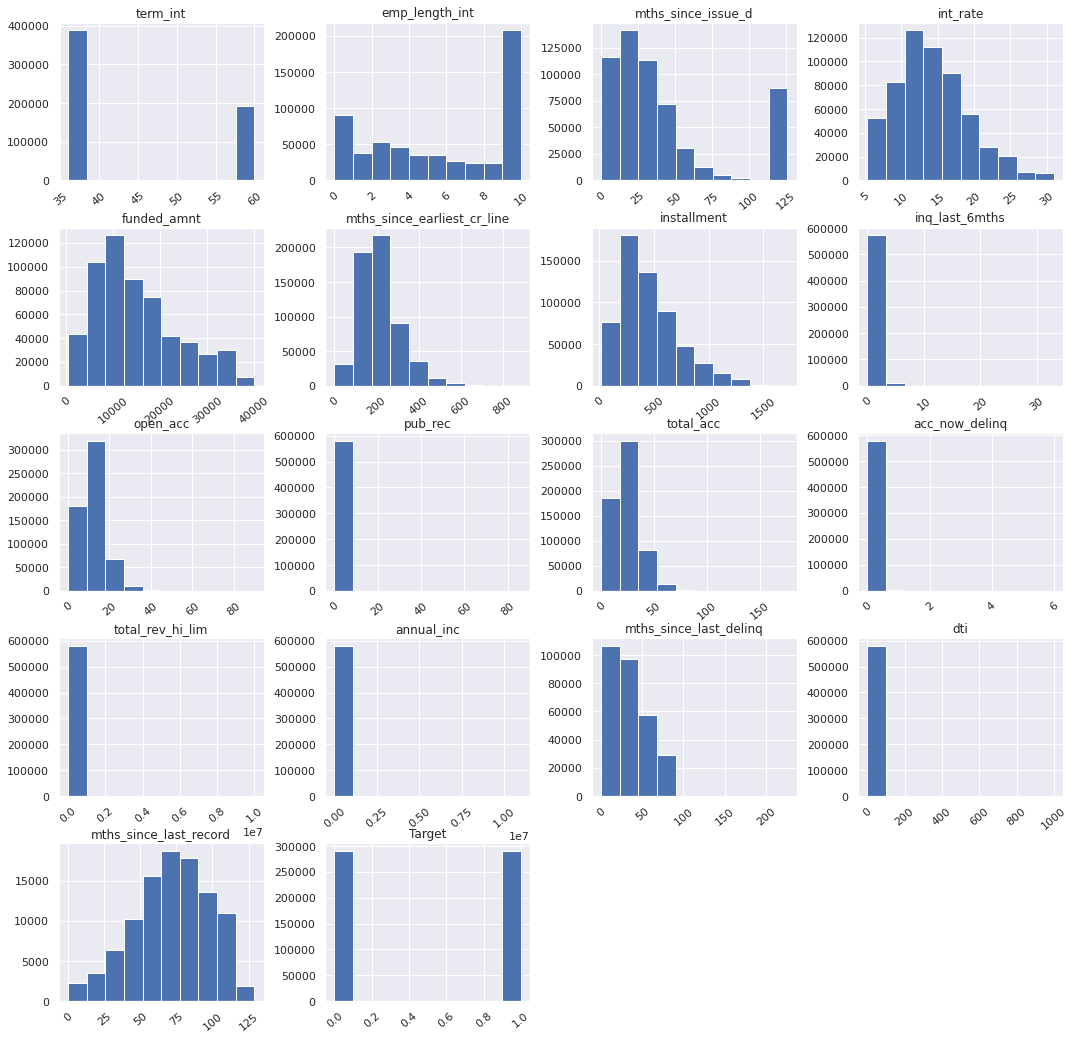

In [15]:
data.hist(figsize=(18,18), xrot=40)
plt.show()

# Side bar for categorical variable

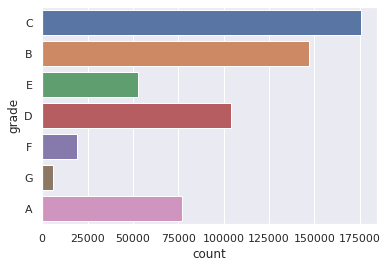

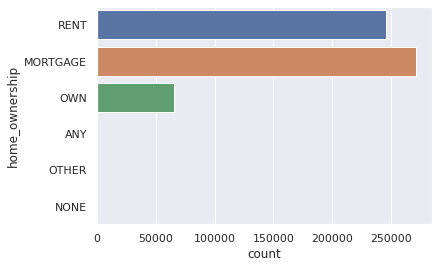

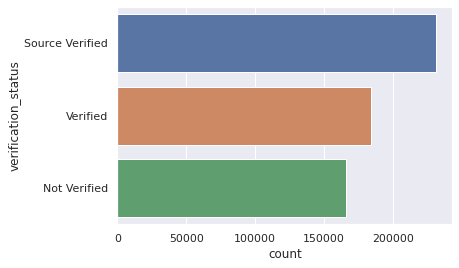

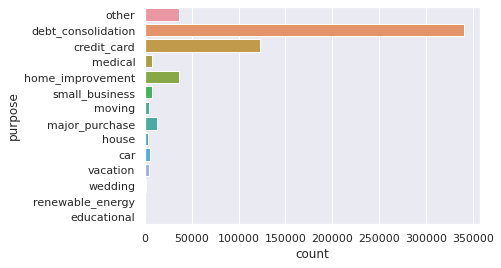

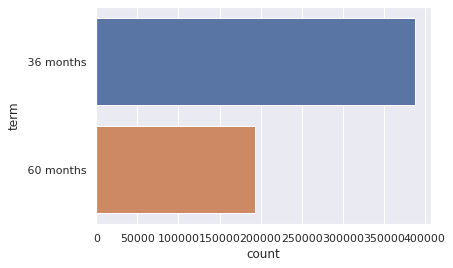

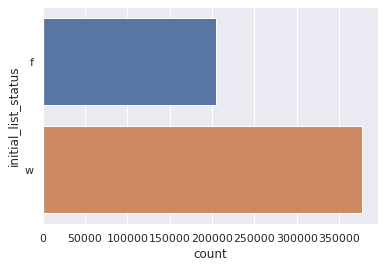

In [16]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 22:
        sns.countplot(y=col, data=data)
        plt.show()

# Box plot for Target 

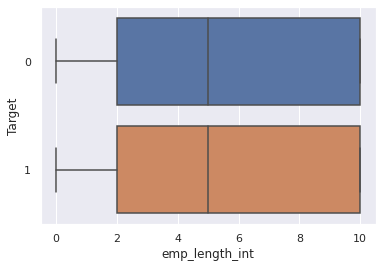

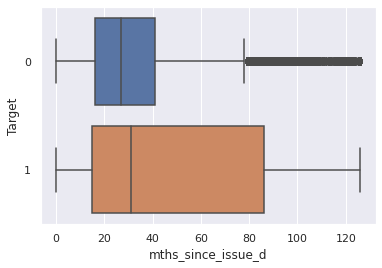

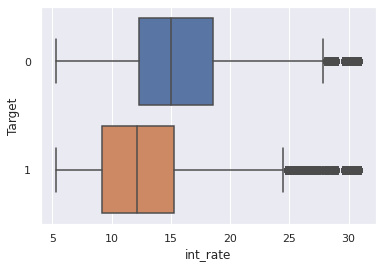

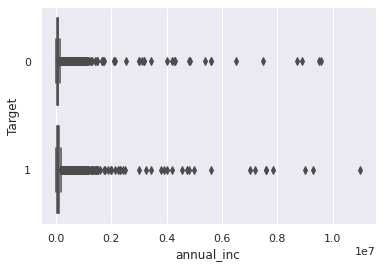

In [17]:
num_cols = ['emp_length_int','mths_since_issue_d','int_rate','annual_inc']
for col in num_cols:
    sns.boxplot(y = data['Target'].astype('category'), x = col, data=data)
    plt.show()

In [18]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <=10:
        #display(pd.crosstab(data['Target'], data[col], normalize='index'))
        display(pd.crosstab(data['Target'], data[col]).apply(lambda r: r/r.sum(), axis=1))
        display(pd.crosstab(data['Target'], data[col]).apply(lambda r: r/r.sum(), axis=0))

grade,A,B,C,D,E,F,G
Target,,,,,,,
0,0.053420,0.197537,0.321012,0.227025,0.131917,0.052351,0.016738
1,0.211645,0.307881,0.283230,0.131057,0.048998,0.013589,0.003600


grade,A,B,C,D,E,F,G
Target,,,,,,,
0,0.201536,0.390839,0.531264,0.634002,0.729165,0.79392,0.822992
1,0.798464,0.609161,0.468736,0.365998,0.270835,0.20608,0.177008


home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
Target,,,,,,
0,0.000254,0.427072,0.000028,0.000131,0.112118,0.460397
1,0.000461,0.503117,0.000014,0.000072,0.112149,0.384187


home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
Target,,,,,,
0,0.355769,0.459124,0.666667,0.644068,0.499931,0.545117
1,0.644231,0.540876,0.333333,0.355932,0.500069,0.454883


verification_status,Not Verified,Source Verified,Verified
Target,,,
0,0.226159,0.407043,0.366799
1,0.344404,0.389482,0.266114


verification_status,Not Verified,Source Verified,Verified
Target,,,
0,0.396378,0.511023,0.579541
1,0.603622,0.488977,0.420459


term,36 months,60 months
Target,,
0,0.606546,0.393454
1,0.728110,0.271890


term,36 months,60 months
Target,,
0,0.454459,0.591354
1,0.545541,0.408646


initial_list_status,f,w
Target,,
0,0.397147,0.602853
1,0.307857,0.692143


initial_list_status,f,w
Target,,
0,0.563326,0.465525
1,0.436674,0.534475


# bar char for distribution of categorical variable compared with target column

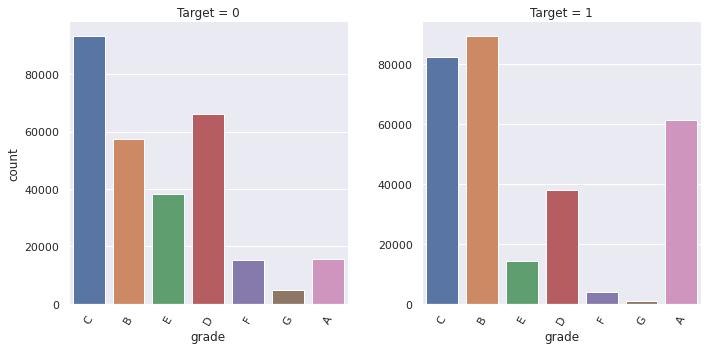

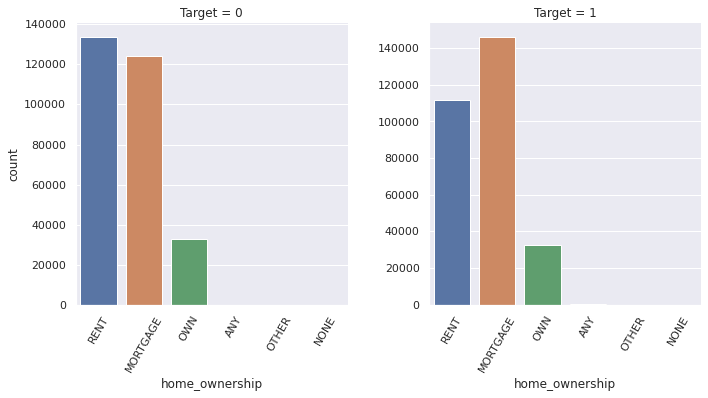

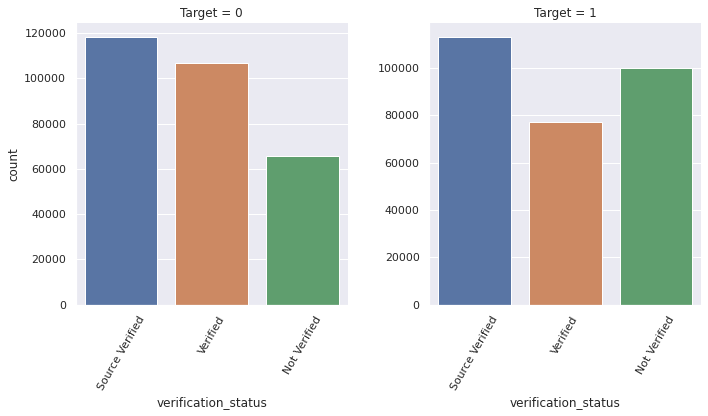

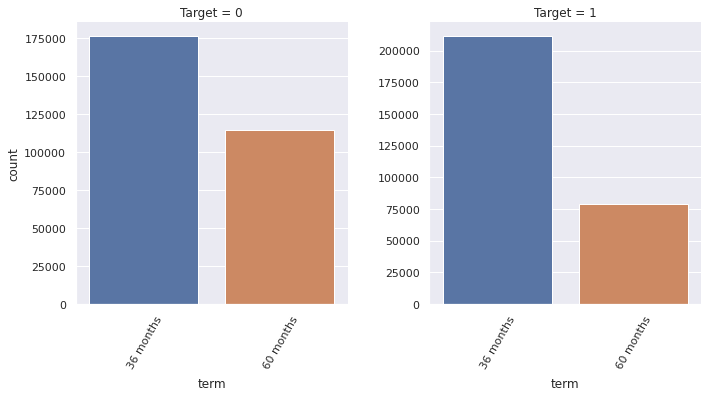

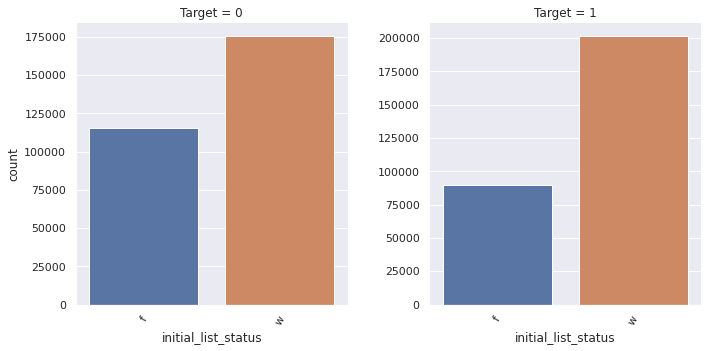

In [19]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 10:
        g = sns.catplot(x = col, kind='count', col = 'Target', data=data, sharey=False)
        g.set_xticklabels(rotation=60)

# distribution of categrorical valut with target colunm percentage table 

In [20]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() <= 3:
        display(data.groupby(col)[['int_rate', 'Target', 'emp_length_int', 'annual_inc']].mean())


,int_rate,Target,emp_length_int,annual_inc
verification_status,,,,
Not Verified,12.404797,0.603622,5.539868,70189.122074
Source Verified,14.233135,0.488977,5.498534,79111.885625
Verified,15.785509,0.420459,5.387656,73995.280899


,int_rate,Target,emp_length_int,annual_inc
term,,,,
36 months,12.809609,0.545541,5.267059,72246.656919
60 months,16.997499,0.408646,5.892837,80364.412833


,int_rate,Target,emp_length_int,annual_inc
initial_list_status,,,,
f,15.067537,0.436674,5.444024,70789.041735
w,13.732037,0.534475,5.492231,77210.935080


# Coerrelation table

In [21]:
corr = data.corr()
corr

,term_int,emp_length_int,mths_since_issue_d,int_rate,funded_amnt,mths_since_earliest_cr_line,installment,inq_last_6mths,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim,annual_inc,mths_since_last_delinq,dti,mths_since_last_record,Target
term_int,1.000000,0.075867,-0.004229,0.391368,0.403067,0.049070,0.147487,0.003838,0.080618,-0.018661,0.108931,-0.001895,0.063064,0.052793,0.009239,0.055073,0.044469,-0.129002
emp_length_int,0.075867,1.000000,-0.013317,-0.006548,0.113609,0.112217,0.096631,0.004127,0.075277,0.011786,0.108466,0.010372,0.079070,0.096729,-0.017451,-0.007597,0.019838,0.024397
mths_since_issue_d,-0.004229,-0.013317,1.000000,-0.064309,0.022395,-0.060665,0.009460,-0.018093,-0.043106,-0.074452,-0.048936,-0.027260,0.020641,0.006159,0.040899,-0.018651,0.133454,0.209868
int_rate,0.391368,-0.006548,-0.064309,1.000000,0.140580,-0.100277,0.172024,0.196022,0.001730,0.044098,-0.027935,0.012546,-0.145419,-0.069186,-0.030646,0.128671,-0.005411,-0.297439
funded_amnt,0.403067,0.113609,0.022395,0.140580,1.000000,0.131913,0.943788,-0.019656,0.180589,-0.050927,0.205055,0.001188,0.295610,0.294183,-0.018779,0.032145,-0.001900,-0.037096
mths_since_earliest_cr_line,0.049070,0.112217,-0.060665,-0.100277,0.131913,1.000000,0.108348,0.030044,0.131605,0.058077,0.274943,0.028374,0.191090,0.113029,-0.039358,0.030215,-0.104450,0.002805
installment,0.147487,0.096631,0.009460,0.172024,0.943788,0.108348,1.000000,0.008798,0.167956,-0.038352,0.179576,0.004584,0.265722,0.282726,-0.027391,0.035205,-0.016738,-0.045392
inq_last_6mths,0.003838,0.004127,-0.018093,0.196022,-0.019656,0.030044,0.008798,1.000000,0.136307,0.062231,0.149861,-0.002615,0.009420,0.032074,0.010886,-0.016499,-0.086856,-0.120180
open_acc,0.080618,0.075277,-0.043106,0.001730,0.180589,0.131605,0.167956,0.136307,1.000000,-0.007045,0.711304,0.017893,0.353222,0.137225,-0.030414,0.191209,0.021331,-0.026085
pub_rec,-0.018661,0.011786,-0.074452,0.044098,-0.050927,0.058077,-0.038352,0.062231,-0.007045,1.000000,0.011018,0.002280,-0.079495,0.000808,0.070410,-0.022492,-0.250179,-0.045456


# Coerrelation heatmap

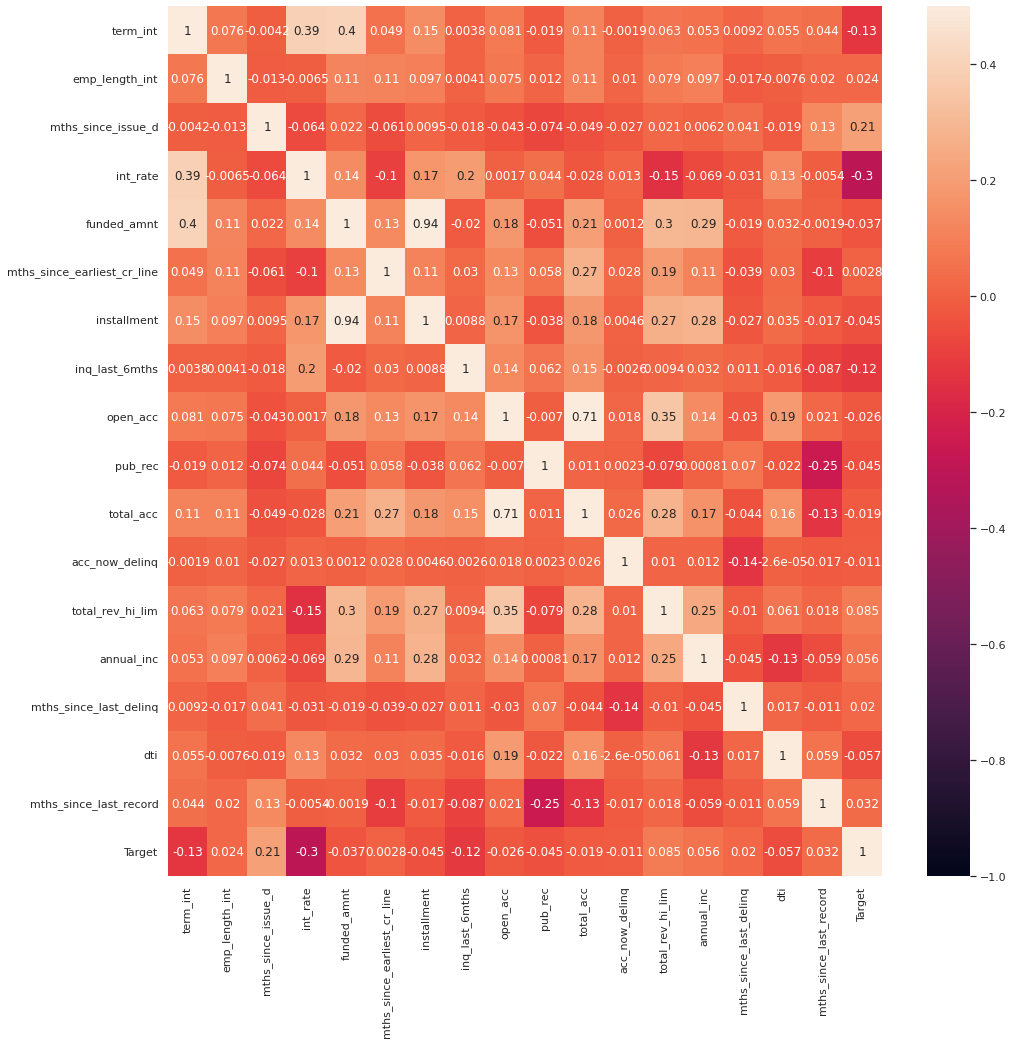

In [34]:

plt.figure(figsize=(16,16))
sns.heatmap(corr,  annot=True, vmax=0.5, vmin=-1)
plt.show()

#buble plot for purpose 

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

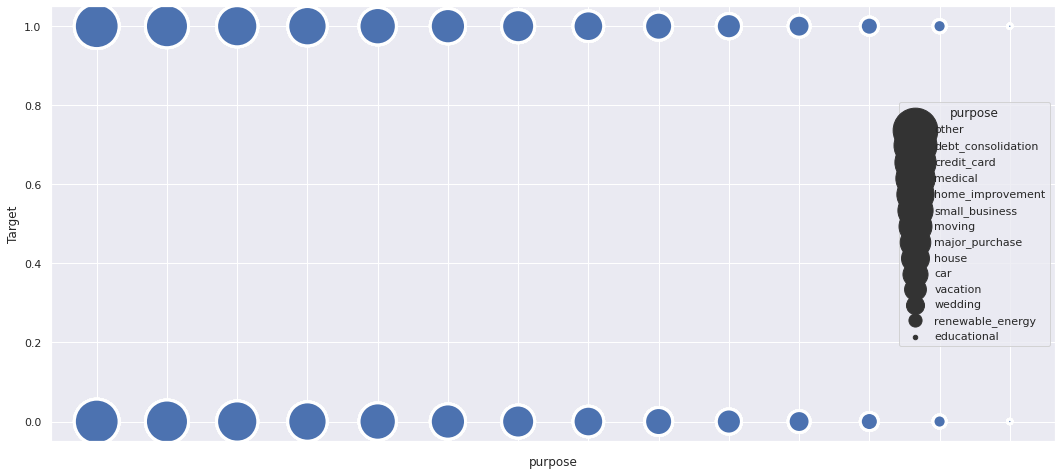

In [29]:
plt.figure(figsize=(18,8))
g=sns.scatterplot(data=data, x="purpose", y="Target", size="purpose",  sizes=(20, 2000))
g.set_xticklabels(g.get_xticklabels(),rotation=60)

CA    81748
NY    49925
TX    47864
FL    43150
IL    22040
NJ    21584
PA    20096
OH    19264
GA    18394
NC    16441
VA    16237
MI    15379
MD    14301
AZ    13826
MA    12956
WA    11259
CO    11247
MN    10082
IN     9809
MO     9495
TN     9244
NV     8780
CT     8591
AL     7696
WI     7358
LA     7155
SC     6646
OR     6090
KY     5729
OK     5725
AR     4741
KS     4483
UT     3765
MS     3540
NM     3298
HI     2887
NH     2556
RI     2453
WV     1984
NE     1972
DE     1630
MT     1492
AK     1328
SD     1231
DC     1186
WY     1136
VT     1050
ME      995
ID      938
ND      871
IA        7
Name: addr_state, dtype: int64

In [47]:
px.data.wind()

,direction,strength,frequency
0,N,0-1,0.5
1,NNE,0-1,0.6
2,NE,0-1,0.5
3,ENE,0-1,0.4
4,E,0-1,0.4
...,...,...,...
123,WSW,6+,0.1
124,W,6+,0.9
125,WNW,6+,2.2
126,NW,6+,1.5
